In [13]:
import numpy as np
import matplotlib.pyplot as plt


100


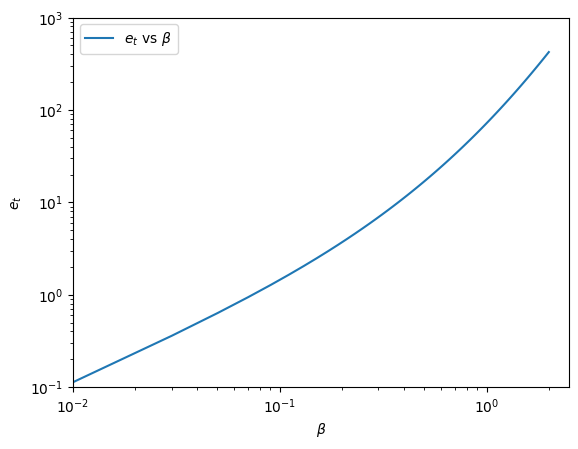

In [14]:
lx = 100
m = np.linspace(1.4,2.8, lx)
print(len(m))
beta = np.linspace(0.01, 2, lx)

def eh(m, beta):
    if isinstance(m,np.ndarray) and isinstance(beta,np.ndarray):
        result = []
        for i in range(len(m)):
            n = ((12*m[i]**3) * (np.log(m[i])) - (3*m[i]**4) - (10*m[i]**3) + (18*m[i]**2) - 6*m[i] + 1)*beta[i]**3

            a = (((12*m[i]**3)-(12*m[i]**4)) * (np.log(m[i])) + (22*m[i]**4) - (58*m[i]**3) + (54*m[i]**2) - (22*m[i]) + 4)*beta[i]**2

            b = (-(6*m[i]**5) + (30*m[i]**4) - (60*m[i]**3) + (60*m[i]**2) - 30*m[i] + 6)*beta[i]

            c = -(2*m[i]**6) + (6*m[i]**5) - (20*m[i]**3) + (30*m[i]**2) - (18*m[i]) + 4

            d = -((beta[i]*(n+a+b+c))/(m[i]-1)**4)
            result.append(d)
    else:
        n = ((12*m**3) * (np.log(m)) - (3*m**4) - (10*m**3) + (18*m**2) - 6*m + 1)*beta**3

        a = (((12*m**3)-(12*m**4)) * (np.log(m)) + (22*m**4) - (58*m**3) + (54*m**2) - (22*m) + 4)*beta**2

        b = (-(6*m**5) + (30*m**4) - (60*m**3) + (60*m**2) - 30*m + 6)*beta

        c = -(2*m**6) + (6*m**5) - (20*m**3) + (30*m**2) - (18*m) + 4

        result = -((beta*(n+a+b+c))/(m-1)**4)
    return result

def eg(m, beta):
    if isinstance(m,np.ndarray) and isinstance(beta,np.ndarray):
        result = []
        for i in range(len(m)):
            v = ((np.pi)*(1+beta[i])*(m[i]-1))/(beta[i]*m[i])
            a = ((m[i]*beta[i])
                /((np.pi)*(m[i]-1)))**4
            b = v**4 + 3.8*v**3 + 9*v**2 + 11.6*v + 6.3
            result.append(a*b-1)
    else:
        v = ((np.pi)*(1+beta)*(m-1))/(beta*m)
        a = ((m*beta)
            /((np.pi)*(m-1)))**4
        b = v**4 + 3.8*v**3 + 9*v**2 + 11.6*v + 6.3
        result = (a*b-1)
    return result

e_h = np.array(eh(m, beta))
e_g = np.array(eg(m, beta))

e_t = e_h + e_g


plt.xscale("log")
plt.yscale("log")
plt.xlabel(r"$\beta$")
plt.ylabel(r'$e_t$')
plt.xlim(1e-2, 2.5)
plt.ylim(1e-1, 1e3)
plt.plot(beta, e_t, label= r"$e_t$ vs $\beta$ ")
plt.legend()
plt.show()

In [15]:
def Gc(rho, Lambda, Jm):
    G_c = (rho * (Lambda**2) * (Jm**2)) / (1-Lambda)
    return G_c


def Rg(kz, theta_c, theta_g, Lambda_w, rho, Lambda, Jm):
    G_c = Gc(rho, Lambda, Jm)
    R_g = (np.pi)*((kz*(theta_c-theta_g))/(Lambda_w*G_c))**(1/2)
    return R_g, G_c

def Theta_g(theta_0, theta_c, Jm, Jc0):
    theta_g = theta_c - (theta_c-theta_0)*(Jm/Jc0)
    return theta_g

def Beta(theta_g, theta_0):
    beta = (theta_g - theta_0)/theta_0
    return beta

def M(R_g, R_m):
    m = R_m/R_g
    return m

def Rm(R_g, m):
    R_m = m*R_g
    return R_m

In [16]:
theta_0 = 4.2 # K
theta_c = 6.5 # K
kz = 0.1 # W m^-1 K^-1
lambda_w = 0.3
rho = 3e-10 #Ohm * m
Lambda = 0.3
Jm = 1.8e9 #A/m^2
Jc0 = 2e9 #A/m^2
theta_g = Theta_g(theta_0=theta_0, theta_c=theta_c, Jc0=Jc0, Jm=Jm) # K

m_double = 1.4
#beta_double = Beta(theta_0=theta_0, theta_g=theta_g)
beta_double = 0.01

R_g, G_c = Rg(kz, theta_c, theta_g, lambda_w, rho, Lambda, Jm)
# R_g = 1e-3
R_m = Rm(R_g, m_double)

h0 = 4.75e3
alpha = 0.5

E_tot = []
e_0 = ((4*np.pi)/3) * (alpha**2) * (R_g**3) * h0

for element in e_t:
    E_tot.append(element*e_0)
    
temp = np.array(E_tot)
E_tot = temp[::-1]


C:\Users\saman\AppData\Local\Temp\ipykernel_12364\1174538830.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


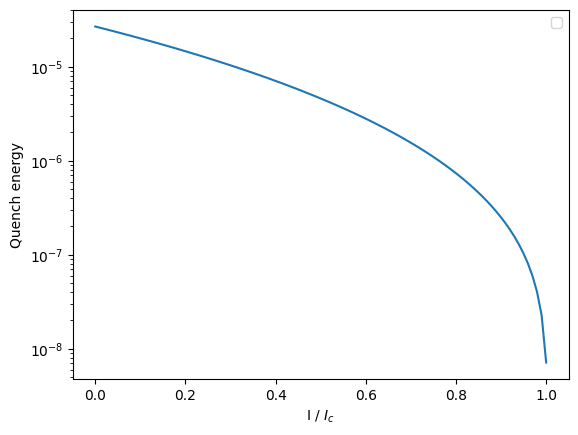

In [17]:
# print(E_tot)
currentRatio = np.linspace(0, 1, lx)
# plt.xscale("log")
plt.yscale("log")
plt.ylabel("Quench energy")
plt.xlabel(r"I / $I_c$")
plt.plot(currentRatio, E_tot)
plt.legend()
plt.show()

In [18]:
# print("The value of",f"\u03B2 =", beta_double)
# print(f"The value of \u03B8_g =", theta_g)
# print("The value of Rg =", R_g)
# print("The value of Rm =", R_m)
# print("The value of et =", e_t)


In [19]:
e_g, e_h, e_t = 0,0,0

e_g = eg(m_double, beta_double)
e_h = eh(m_double, beta_double)
e_t = e_g + e_h

print("The value of",f"\u03B2 =", beta_double)
print(f"The value of \u03B8_g =", theta_g)
print("The value of Rg =", R_g)
print("The value of Rm =", R_m)
print("The value of et =", e_t)
print("The value of Gc =", G_c)



The value of β = 0.01
The value of θ_g = 4.43
The value of Rg = 0.00023343665470924773
The value of Rm = 0.00032681131659294683
The value of et = 0.11281895813445518
The value of Gc = 124971428.57142855
